In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
### 시각화 라이브러리 사용 중, 한글 폰트 깨짐 문제 해결(1번 방법)
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()  # 윈도우인 경우
    rc('font', family=font_name)
else:    
    rc('font', family='AppleGothic')  # Mac 인 경우

### 시각화 라이브러리 사용 중, 한글 폰트 깨짐 문제 해결(2번 방법)
* [참조 사이트 | 24시 방구석 통계학(ITISIK 님)](https://m.blog.naver.com/itisik/221789012960)

1. C:\Users\사용자 이름\anaconda3\Lib\site-packages\matplotlib\mpl-data 경로에 진입
2. matplotlibrc 파일을 VSCode나 메모장 등으로 열기
3. line 400 부분에 "#axes.unicode_minus: True" 부분을 "axes.unicode_minus: False(한글 폰트 사용 시, 음수(-) 표시에서 깨지는 현상을 방지하기 위해)"로 설정
4. line 249 부분에 #font.family: san-serif 부분을 "font.family: 주로 사용하는 폰트명(ex: NanumGothicCoding)"으로 설정

In [4]:
pd.__version__

'1.1.3'

In [5]:
np.__version__

'1.19.2'

## apt15.09.csv 파일을 뜯고 맛보자!

In [84]:
apt15_sale = pd.read_csv('0.dataSet/avg15.09.csv', encoding='utf-8',
                         skiprows=1, header=0, engine='python')
apt15_sale.shape

(23, 27)

In [85]:
# pandas를 활용해 컬럼명을 수정해 줄 필요가 있음
print(type(apt15_sale))
apt15_sale.head()

<class 'pandas.core.frame.DataFrame'>


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,구분,NaN,2013년,2014년,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(단위: 천원/3.3㎡)
1,시도,시군구,12월,1월,2월,3월,4월,5월,6월,7월,...,3월,4월,5월,6월,7월,8월,9월,전월비,전년말비,전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477


In [30]:
apt15_sale.tail()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
18,NaN,전남,"5,678","5,678","5,678","5,696","5,736","5,656","5,609","5,780",...,"5,825","5,940","6,050","6,243","6,286","6,289","6,245",-43,461,441
19,NaN,경북,"6,168","6,168","6,234","6,317","6,412","6,409","6,554","6,556",...,"6,997","7,006","6,966","6,887","7,035","7,037","7,029",-9,39,451
20,NaN,경남,"6,473","6,485","6,502","6,610","6,599","6,610","6,615","6,613",...,"7,668","7,683","7,717","7,715","7,723","7,665","7,947",282,615,"1,179"
21,NaN,제주,"7,674","7,900","7,900","7,900","7,900","7,900","7,914","7,914",...,"7,826","7,285","7,285","7,343","7,343","7,343","7,379",36,-360,-453
22,NaN,NaN,"6,432","6,462","6,435","6,443","6,566","6,552","6,578","6,605",...,"6,873","6,899","6,900","6,925","6,961","6,933","7,019",85,203,321


In [31]:
apt15_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   9 non-null      object
 1   Unnamed: 1   15 non-null     object
 2   Unnamed: 2   23 non-null     object
 3   Unnamed: 3   23 non-null     object
 4   Unnamed: 4   22 non-null     object
 5   Unnamed: 5   22 non-null     object
 6   Unnamed: 6   22 non-null     object
 7   Unnamed: 7   22 non-null     object
 8   Unnamed: 8   22 non-null     object
 9   Unnamed: 9   22 non-null     object
 10  Unnamed: 10  22 non-null     object
 11  Unnamed: 11  22 non-null     object
 12  Unnamed: 12  22 non-null     object
 13  Unnamed: 13  22 non-null     object
 14  Unnamed: 14  22 non-null     object
 15  Unnamed: 15  23 non-null     object
 16  Unnamed: 16  22 non-null     object
 17  Unnamed: 17  22 non-null     object
 18  Unnamed: 18  22 non-null     object
 19  Unnamed: 19  22 non-null     ob

In [32]:
apt15_sale.dtypes

Unnamed: 0     object
Unnamed: 1     object
Unnamed: 2     object
Unnamed: 3     object
Unnamed: 4     object
Unnamed: 5     object
Unnamed: 6     object
Unnamed: 7     object
Unnamed: 8     object
Unnamed: 9     object
Unnamed: 10    object
Unnamed: 11    object
Unnamed: 12    object
Unnamed: 13    object
Unnamed: 14    object
Unnamed: 15    object
Unnamed: 16    object
Unnamed: 17    object
Unnamed: 18    object
Unnamed: 19    object
Unnamed: 20    object
Unnamed: 21    object
Unnamed: 22    object
Unnamed: 23    object
Unnamed: 24    object
Unnamed: 25    object
Unnamed: 26    object
dtype: object

In [33]:
# 평균 분양가격에 결측치 확인
apt15_sale.isnull().sum()

Unnamed: 0     14
Unnamed: 1      8
Unnamed: 2      0
Unnamed: 3      0
Unnamed: 4      1
Unnamed: 5      1
Unnamed: 6      1
Unnamed: 7      1
Unnamed: 8      1
Unnamed: 9      1
Unnamed: 10     1
Unnamed: 11     1
Unnamed: 12     1
Unnamed: 13     1
Unnamed: 14     1
Unnamed: 15     0
Unnamed: 16     1
Unnamed: 17     1
Unnamed: 18     1
Unnamed: 19     1
Unnamed: 20     1
Unnamed: 21     1
Unnamed: 22     1
Unnamed: 23     1
Unnamed: 24     1
Unnamed: 25     1
Unnamed: 26     0
dtype: int64

<AxesSubplot:>

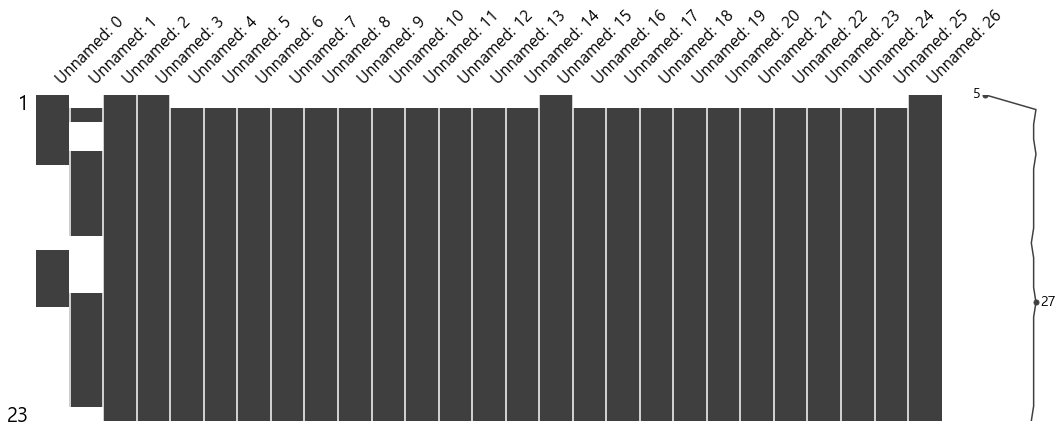

In [34]:
# 결측치 간단 시각화
import missingno as msno
msno.matrix(apt15_sale, figsize=(18,6))

### 결측치? 삽입 및 컬럼명 변경

In [35]:
year = apt15_sale.iloc[0]
month = apt15_sale.iloc[1]

In [36]:
# 결측치 채워주기
year

Unnamed: 0                구분
Unnamed: 1               NaN
Unnamed: 2             2013년
Unnamed: 3             2014년
Unnamed: 4               NaN
Unnamed: 5               NaN
Unnamed: 6               NaN
Unnamed: 7               NaN
Unnamed: 8               NaN
Unnamed: 9               NaN
Unnamed: 10              NaN
Unnamed: 11              NaN
Unnamed: 12              NaN
Unnamed: 13              NaN
Unnamed: 14              NaN
Unnamed: 15            2015년
Unnamed: 16              NaN
Unnamed: 17              NaN
Unnamed: 18              NaN
Unnamed: 19              NaN
Unnamed: 20              NaN
Unnamed: 21              NaN
Unnamed: 22              NaN
Unnamed: 23              NaN
Unnamed: 24              NaN
Unnamed: 25              NaN
Unnamed: 26    (단위: 천원/3.3㎡)
Name: 0, dtype: object

In [37]:
month

Unnamed: 0        시도
Unnamed: 1       시군구
Unnamed: 2       12월
Unnamed: 3        1월
Unnamed: 4        2월
Unnamed: 5        3월
Unnamed: 6        4월
Unnamed: 7        5월
Unnamed: 8        6월
Unnamed: 9        7월
Unnamed: 10       8월
Unnamed: 11       9월
Unnamed: 12      10월
Unnamed: 13      11월
Unnamed: 14      12월
Unnamed: 15       1월
Unnamed: 16       2월
Unnamed: 17       3월
Unnamed: 18       4월
Unnamed: 19       5월
Unnamed: 20       6월
Unnamed: 21       7월
Unnamed: 22       8월
Unnamed: 23       9월
Unnamed: 24      전월비
Unnamed: 25     전년말비
Unnamed: 26    전년동월비
Name: 1, dtype: object

In [38]:
# 컬럼을 새로 추가하기 위해 0번째, 1번째 행을 병합함
for m, y in enumerate(year):
    if m > 2 and m < 15:
        year[m] = ' '.join(['2014년', month[m]])
    elif m >= 15:
        year[m] = ' '.join(['2015년', month[m]])
    elif m == 2:
        year[m] = ' '.join([year[m], month[m]])
    elif m == 1:
        year[m] = '시군구'
year

Unnamed: 0              구분
Unnamed: 1             시군구
Unnamed: 2       2013년 12월
Unnamed: 3        2014년 1월
Unnamed: 4        2014년 2월
Unnamed: 5        2014년 3월
Unnamed: 6        2014년 4월
Unnamed: 7        2014년 5월
Unnamed: 8        2014년 6월
Unnamed: 9        2014년 7월
Unnamed: 10       2014년 8월
Unnamed: 11       2014년 9월
Unnamed: 12      2014년 10월
Unnamed: 13      2014년 11월
Unnamed: 14      2014년 12월
Unnamed: 15       2015년 1월
Unnamed: 16       2015년 2월
Unnamed: 17       2015년 3월
Unnamed: 18       2015년 4월
Unnamed: 19       2015년 5월
Unnamed: 20       2015년 6월
Unnamed: 21       2015년 7월
Unnamed: 22       2015년 8월
Unnamed: 23       2015년 9월
Unnamed: 24      2015년 전월비
Unnamed: 25     2015년 전년말비
Unnamed: 26    2015년 전년동월비
Name: 0, dtype: object

In [39]:
apt15_sale.columns = year

In [40]:
apt15_sale

,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,...,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비
0,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,...,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비
1,시도,시군구,12월,1월,2월,3월,4월,5월,6월,7월,...,3월,4월,5월,6월,7월,8월,9월,전월비,전년말비,전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
7,NaN,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
8,NaN,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414
9,NaN,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153",...,"8,629","9,380","9,192","9,190","9,190","9,215","9,215",0,324,722


In [41]:
apt15_sale = apt15_sale.drop(apt15_sale.index[[0, 1]])
apt15_sale

,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,...,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
7,NaN,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
8,NaN,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414
9,NaN,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153",...,"8,629","9,380","9,192","9,190","9,190","9,215","9,215",0,324,722
10,NaN,NaN,"8,151","8,355","8,597","8,552","8,585","8,606","8,669","8,648",...,"8,692","8,858","8,967","8,942","8,984","9,058","9,023",-36,325,352
11,경기,NaN,"10,855","10,855","10,791","10,784","10,876","10,646","10,266","10,124",...,"10,469","10,684","10,685","10,573","10,518","10,573","10,341",-232,-38,-160


In [42]:
apt15_sale['구분'] = apt15_sale['구분'].fillna('')
apt15_sale['시군구'] = apt15_sale['시군구'].fillna('')

In [43]:
apt15_sale

,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,...,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비
2,전국,,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
7,,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
8,,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414
9,,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153",...,"8,629","9,380","9,192","9,190","9,190","9,215","9,215",0,324,722
10,,,"8,151","8,355","8,597","8,552","8,585","8,606","8,669","8,648",...,"8,692","8,858","8,967","8,942","8,984","9,058","9,023",-36,325,352
11,경기,,"10,855","10,855","10,791","10,784","10,876","10,646","10,266","10,124",...,"10,469","10,684","10,685","10,573","10,518","10,573","10,341",-232,-38,-160


In [44]:
# '지역'이라는 컬럼을 추가하여 구분(시도)과 시군구를 병합함
apt15_sale['지역'] = apt15_sale['구분'] + apt15_sale['시군구']
print(apt15_sale['지역'])

2          전국
3          서울
4     6대광역시부산
5          대구
6          인천
7          광주
8          대전
9          울산
10           
11         경기
12        수도권
13         세종
14       지방강원
15         충북
16         충남
17         전북
18         전남
19         경북
20         경남
21         제주
22           
Name: 지역, dtype: object


In [45]:
# pandas.melt() 함수 사용을 위해 컬럼명을 복사함
melt_columns = apt15_sale.columns.copy()
melt_columns

Index(['구분', '시군구', '2013년 12월', '2014년 1월', '2014년 2월', '2014년 3월',
       '2014년 4월', '2014년 5월', '2014년 6월', '2014년 7월', '2014년 8월', '2014년 9월',
       '2014년 10월', '2014년 11월', '2014년 12월', '2015년 1월', '2015년 2월',
       '2015년 3월', '2015년 4월', '2015년 5월', '2015년 6월', '2015년 7월', '2015년 8월',
       '2015년 9월', '2015년 전월비', '2015년 전년말비', '2015년 전년동월비', '지역'],
      dtype='object', name=0)

In [46]:
apt13_15 = pd.melt(apt15_sale, id_vars=['지역'], value_vars=['2013년 12월', '2014년 1월', '2014년 2월', '2014년 3월',
       '2014년 4월', '2014년 5월', '2014년 6월', '2014년 7월', '2014년 8월', '2014년 9월',
       '2014년 10월', '2014년 11월', '2014년 12월', '2015년 1월', '2015년 2월',
       '2015년 3월', '2015년 4월', '2015년 5월', '2015년 6월', '2015년 7월', '2015년 8월',
       '2015년 9월'])
apt13_15

,지역,0,value
0,전국,2013년 12월,"8,059"
1,서울,2013년 12월,"18,189"
2,6대광역시부산,2013년 12월,"8,111"
3,대구,2013년 12월,"8,080"
4,인천,2013년 12월,"10,204"
...,...,...,...
457,전남,2015년 9월,"6,245"
458,경북,2015년 9월,"7,029"
459,경남,2015년 9월,"7,947"
460,제주,2015년 9월,"7,379"


In [47]:
apt13_15.columns = ['지역', '기간', '분양가']
apt13_15

,지역,기간,분양가
0,전국,2013년 12월,"8,059"
1,서울,2013년 12월,"18,189"
2,6대광역시부산,2013년 12월,"8,111"
3,대구,2013년 12월,"8,080"
4,인천,2013년 12월,"10,204"
...,...,...,...
457,전남,2015년 9월,"6,245"
458,경북,2015년 9월,"7,029"
459,경남,2015년 9월,"7,947"
460,제주,2015년 9월,"7,379"


In [48]:
apt13_15['연도'] = apt13_15['기간'].apply(lambda year_month : year_month.split('년')[0])
apt13_15['월'] = apt13_15['기간'].apply(lambda year_month : re.sub('월', '', year_month.split('년')[1]).strip())
print(type(apt13_15))
apt13_15

<class 'pandas.core.frame.DataFrame'>


,지역,기간,분양가,연도,월
0,전국,2013년 12월,"8,059",2013,12
1,서울,2013년 12월,"18,189",2013,12
2,6대광역시부산,2013년 12월,"8,111",2013,12
3,대구,2013년 12월,"8,080",2013,12
4,인천,2013년 12월,"10,204",2013,12
...,...,...,...,...,...
457,전남,2015년 9월,"6,245",2015,9
458,경북,2015년 9월,"7,029",2015,9
459,경남,2015년 9월,"7,947",2015,9
460,제주,2015년 9월,"7,379",2015,9


### '지역' 컬럼 중 "지방강원"과 "6대광역시부산"의 값을 "강원", "부산"으로 바꾸기

In [49]:
apt13_15['지역'].value_counts()

           44
울산         22
경기         22
세종         22
전남         22
경북         22
전북         22
전국         22
광주         22
지방강원       22
제주         22
경남         22
충북         22
대전         22
인천         22
충남         22
수도권        22
대구         22
서울         22
6대광역시부산    22
Name: 지역, dtype: int64

In [50]:
# re.sub('기존값', '치환할 값', value): 문자열 치환
apt13_15['지역'] = apt13_15['지역'].apply(lambda region: re.sub('지방강원', '강원', region))
apt13_15['지역'] = apt13_15['지역'].apply(lambda region: re.sub('6대광역시부산', '부산', region))
apt13_15['지역'].value_counts()

       44
울산     22
경기     22
세종     22
부산     22
경북     22
전북     22
전국     22
광주     22
경남     22
제주     22
대전     22
인천     22
충남     22
수도권    22
대구     22
서울     22
전남     22
강원     22
충북     22
Name: 지역, dtype: int64

In [51]:
apt13_15.describe()

,지역,기간,분양가,연도,월
count,462,462,462,462,462
unique,20,22,371,3,12
top,,2015년 8월,"8,067",2014,2
freq,44,21,7,252,42


In [52]:
apt13_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      462 non-null    object
 1   기간      462 non-null    object
 2   분양가     462 non-null    object
 3   연도      462 non-null    object
 4   월       462 non-null    object
dtypes: object(5)
memory usage: 18.2+ KB


In [53]:
apt13_15['분양가격'] = apt13_15['분양가'].str.replace(',', '').astype(int)
apt13_15

,지역,기간,분양가,연도,월,분양가격
0,전국,2013년 12월,"8,059",2013,12,8059
1,서울,2013년 12월,"18,189",2013,12,18189
2,부산,2013년 12월,"8,111",2013,12,8111
3,대구,2013년 12월,"8,080",2013,12,8080
4,인천,2013년 12월,"10,204",2013,12,10204
...,...,...,...,...,...,...
457,전남,2015년 9월,"6,245",2015,9,6245
458,경북,2015년 9월,"7,029",2015,9,7029
459,경남,2015년 9월,"7,947",2015,9,7947
460,제주,2015년 9월,"7,379",2015,9,7379


## avg18.07.csv 파일을 뜯고 맛보자!

In [7]:
apt18_sale = pd.read_csv('0.dataSet/avg18.07.csv', encoding='utf-8', engine='python')
apt18_sale.shape

(2890, 5)

In [8]:
apt18_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [9]:
apt18_sale.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
2885,제주,전체,2018,7,3334
2886,제주,전용면적 60㎡이하,2018,7,NaN
2887,제주,전용면적 60㎡초과 85㎡이하,2018,7,3356
2888,제주,전용면적 85㎡초과 102㎡이하,2018,7,3226
2889,제주,전용면적 102㎡초과,2018,7,2990


In [10]:
apt18_sale.dtypes

지역명        object
규모구분       object
연도          int64
월           int64
분양가격(㎡)    object
dtype: object

In [11]:
# 평균 분양가격에 결측치 확인
apt18_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    140
dtype: int64

In [12]:
apt18_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      2890 non-null   object
 1   규모구분     2890 non-null   object
 2   연도       2890 non-null   int64 
 3   월        2890 non-null   int64 
 4   분양가격(㎡)  2750 non-null   object
dtypes: int64(2), object(3)
memory usage: 113.0+ KB


<AxesSubplot:>

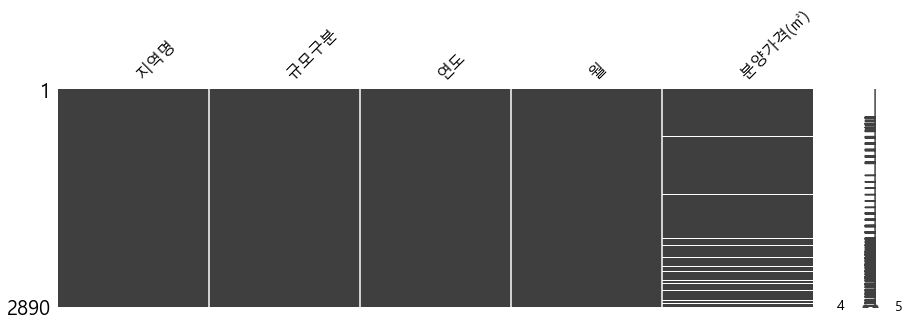

In [13]:
# 18년 데이터 결측치 확인
import missingno as msno
msno.matrix(apt18_sale, figsize=(15,4))

In [14]:
# '연도' 컬럼과 '월' 컬럼이 카테고리 형태의 데이터 구조이므로 String 형태로 변경함
apt18_sale['연도'] = apt18_sale['연도'].astype(str)
apt18_sale['월'] = apt18_sale['월'].astype(str)

In [15]:
apt18_sale_price = apt18_sale['분양가격(㎡)']

In [16]:
# '분양가격(㎡)' 컬럼의 타입을 숫자로 변경함
apt18_sale['분양가격'] = pd.to_numeric(apt18_sale_price, errors='coerce')
# '평당분양가격'이라는 컬럼을 생성함
apt18_sale['평당분양가격'] = apt18_sale['분양가격'] * 3.3

In [17]:
apt18_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      2890 non-null   object 
 1   규모구분     2890 non-null   object 
 2   연도       2890 non-null   object 
 3   월        2890 non-null   object 
 4   분양가격(㎡)  2750 non-null   object 
 5   분양가격     2658 non-null   float64
 6   평당분양가격   2658 non-null   float64
dtypes: float64(2), object(5)
memory usage: 158.2+ KB


In [18]:
apt18_sale.dtypes

지역명         object
규모구분        object
연도          object
월           object
분양가격(㎡)     object
분양가격       float64
평당분양가격     float64
dtype: object

In [19]:
apt18_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    140
분양가격       232
평당분양가격     232
dtype: int64

In [20]:
apt18_sale.describe()

,분양가격,평당분양가격
count,2658.000000,2658.000000
mean,3063.297216,10108.880813
std,1112.743769,3672.054436
min,1868.000000,6164.400000
25%,2348.000000,7748.400000
50%,2743.000000,9051.900000
75%,3293.750000,10869.375000
max,8098.000000,26723.400000


In [21]:
apt18_sale.describe(include=[np.object])

,지역명,규모구분,연도,월,분양가격(㎡)
count,2890,2890,2890,2890,2750
unique,17,5,4,12,1305
top,강원,전용면적 85㎡초과 102㎡이하,2016,6,2221
freq,170,578,1020,255,17


In [86]:
# 특정 년도(2018년) 데이터만 조회함
apt18_sale_2018 = apt18_sale.loc[apt18_sale['연도'] == '2018']
print(type(apt18_sale_2018))
print(apt18_sale_2018.shape)
apt18_sale_2018.head(20)

<class 'pandas.core.frame.DataFrame'>
(595, 7)


,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
2295,서울,전체,2018,1,6623,"6,623","21,856"
2296,서울,전용면적 60㎡이하,2018,1,6898,"6,898","22,763"
2297,서울,전용면적 60㎡초과 85㎡이하,2018,1,5857,"5,857","19,328"
2298,서울,전용면적 85㎡초과 102㎡이하,2018,1,7478,"7,478","24,677"
2299,서울,전용면적 102㎡초과,2018,1,6916,"6,916","22,823"
2300,인천,전체,2018,1,3333,"3,333","10,999"
2301,인천,전용면적 60㎡이하,2018,1,3376,"3,376","11,141"
2302,인천,전용면적 60㎡초과 85㎡이하,2018,1,3324,"3,324","10,969"
2303,인천,전용면적 85㎡초과 102㎡이하,2018,1,3478,"3,478","11,477"
2304,인천,전용면적 102㎡초과,2018,1,4835,"4,835","15,956"


In [23]:
# 시도별로 동일한 데이터가 존재한다는 점이 확인됨
apt18_sale['규모구분'].value_counts()

전용면적 85㎡초과 102㎡이하    578
전용면적 60㎡초과 85㎡이하     578
전체                   578
전용면적 60㎡이하           578
전용면적 102㎡초과          578
Name: 규모구분, dtype: int64

In [24]:
apt18_sale['지역명'].value_counts()

강원    170
서울    170
전북    170
충북    170
제주    170
대전    170
인천    170
대구    170
광주    170
충남    170
경남    170
울산    170
경기    170
세종    170
부산    170
경북    170
전남    170
Name: 지역명, dtype: int64

### 전국 평균 분양가는 얼마일까?
* groupby와 pivot_table 활용

In [88]:
pd.options.display.float_format = '{:,.0f}'.format
apt18_sale.groupby(apt18_sale.연도).describe().T

연도             2015   2016   2017   2018
분양가격   count    243    984    899    532
       mean   2,789  2,934  3,140  3,299
       std      977  1,071  1,108  1,196
       min    1,868  1,900  1,976  2,076
       25%    2,225  2,282  2,365  2,471
       50%    2,516  2,672  2,849  2,914
       75%    3,026  3,148  3,456  3,647
       max    7,092  8,096  7,887  8,098
평당분양가격 count    243    984    899    532
       mean   9,203  9,683 10,360 10,885
       std    3,224  3,536  3,655  3,947
       min    6,164  6,270  6,521  6,851
       25%    7,342  7,531  7,804  8,154
       50%    8,303  8,818  9,402  9,616
       75%    9,984 10,390 11,405 12,036
       max   23,404 26,717 26,027 26,723

### 규모별 전국 평균 분양가는 얼마일까?

In [26]:
apt18_sale.pivot_table('평당분양가격', '규모구분', '연도')

연도,2015,2016,2017,2018
규모구분,,,,
전용면적 102㎡초과,"9,837","10,389","11,334","11,235"
전용면적 60㎡이하,"8,952","9,399","10,246","10,912"
전용면적 60㎡초과 85㎡이하,"8,892","9,296","9,825","10,464"
전용면적 85㎡초과 102㎡이하,"9,519","10,122","10,540","11,483"
전체,"8,893","9,293","9,901","10,563"


### 전국 분양가의 변동금액은 얼마나 될까?

In [81]:
# '규모구분' 컬럼에서 "전체"로 되어있는 데이터만 조회함
reg_year_all = apt18_sale.loc[apt18_sale['규모구분'] == '전체']
reg_year = reg_year_all.pivot_table('평당분양가격', '지역명', '연도').reset_index()
reg_year

연도,지역명,2015,2016,2017,2018
0,강원,"7,160","7,011","7,127","7,641"
1,경기,"10,377","11,220","11,850","12,881"
2,경남,"7,586","7,848","8,120","8,894"
3,경북,"7,171","7,361","7,795","8,342"
4,광주,"8,052","8,899","9,464","9,638"
5,대구,"9,232","10,310","11,456","11,737"
6,대전,"8,098","8,502","9,045","9,604"
7,부산,"10,307","10,430","11,578","12,756"
8,서울,"19,725","20,663","21,376","22,329"
9,세종,"8,750","8,860","9,135","10,375"


In [28]:
reg_year['분양가변동금액'] = (reg_year['2018'] - reg_year['2015']).astype(int)
max_price = np.max(reg_year['분양가변동금액']) * 1000  # 단위: 천원
min_price = np.min(reg_year['분양가변동금액']) * 1000  # 단위: 천원
mean_price = np.mean(reg_year['분양가변동금액']) * 1000  # 단위: 천원

print('## 분양가 변동금액 중 가장 큰 값: {:,.0f}'.format(max_price), '원')
print('## 분양가 변동금액 중 가장 작은 값: {:,.0f}'.format(min_price), '원')
print('## 분양가 변동금액의 평균값: {:,.0f}'.format(mean_price), '원')

reg_year.sort_values(['분양가변동금액'], ascending=False)

## 분양가 변동금액 중 가장 큰 값: 5,087,000 원
## 분양가 변동금액 중 가장 작은 값: 369,000 원
## 분양가 변동금액의 평균값: 1,669,588 원


연도,지역명,2015,2016,2017,2018,분양가변동금액
14,제주,"7,405","9,129","10,831","12,492",5087
8,서울,"19,725","20,663","21,376","22,329",2603
5,대구,"9,232","10,310","11,456","11,737",2504
1,경기,"10,377","11,220","11,850","12,881",2503
7,부산,"10,307","10,430","11,578","12,756",2449
9,세종,"8,750","8,860","9,135","10,375",1624
4,광주,"8,052","8,899","9,464","9,638",1585
6,대전,"8,098","8,502","9,045","9,604",1506
12,전남,"6,317","6,489","7,188","7,792",1474
2,경남,"7,586","7,848","8,120","8,894",1308


## avg15 + avg18

In [54]:
apt18_sale

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,"5,841","19,275"
1,서울,전용면적 60㎡이하,2015,10,5652,"5,652","18,652"
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,"5,882","19,411"
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,"5,721","18,879"
4,서울,전용면적 102㎡초과,2015,10,5879,"5,879","19,401"
...,...,...,...,...,...,...,...
2885,제주,전체,2018,7,3334,"3,334","11,002"
2886,제주,전용면적 60㎡이하,2018,7,NaN,nan,nan
2887,제주,전용면적 60㎡초과 85㎡이하,2018,7,3356,"3,356","11,075"
2888,제주,전용면적 85㎡초과 102㎡이하,2018,7,3226,"3,226","10,646"


In [55]:
apt13_15

,지역,기간,분양가,연도,월,분양가격
0,전국,2013년 12월,"8,059",2013,12,8059
1,서울,2013년 12월,"18,189",2013,12,18189
2,부산,2013년 12월,"8,111",2013,12,8111
3,대구,2013년 12월,"8,080",2013,12,8080
4,인천,2013년 12월,"10,204",2013,12,10204
...,...,...,...,...,...,...
457,전남,2015년 9월,"6,245",2015,9,6245
458,경북,2015년 9월,"7,029",2015,9,7029
459,경남,2015년 9월,"7,947",2015,9,7947
460,제주,2015년 9월,"7,379",2015,9,7379


In [56]:
apt15_18 = apt18_sale.loc[apt18_sale['규모구분'] == '전체']
print(apt15_18.shape)
apt15_18.head()

(578, 7)


,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,"5,841","19,275"
5,인천,전체,2015,10,3163,"3,163","10,438"
10,경기,전체,2015,10,3138,"3,138","10,355"
15,부산,전체,2015,10,3112,"3,112","10,270"
20,대구,전체,2015,10,2682,"2,682","8,851"


In [57]:
apt13_15.columns

Index(['지역', '기간', '분양가', '연도', '월', '분양가격'], dtype='object')

In [58]:
apt13_15_merge = apt13_15[['지역', '연도', '월', '분양가격']]
apt13_15_merge.head()

,지역,연도,월,분양가격
0,전국,2013,12,8059
1,서울,2013,12,18189
2,부산,2013,12,8111
3,대구,2013,12,8080
4,인천,2013,12,10204


In [59]:
apt13_15_merge.columns

Index(['지역', '연도', '월', '분양가격'], dtype='object')

In [60]:
apt13_15_merge.columns = ['지역명', '연도', '월', '평당분양가격']
apt13_15_merge

,지역명,연도,월,평당분양가격
0,전국,2013,12,8059
1,서울,2013,12,18189
2,부산,2013,12,8111
3,대구,2013,12,8080
4,인천,2013,12,10204
...,...,...,...,...
457,전남,2015,9,6245
458,경북,2015,9,7029
459,경남,2015,9,7947
460,제주,2015,9,7379


In [61]:
apt13_15_merge.describe()

,평당분양가격
count,462
mean,"8,611"
std,"2,868"
min,"5,609"
25%,"6,754"
50%,"8,067"
75%,"8,980"
max,"20,670"


In [62]:
apt15_18_merge = apt15_18[['지역명', '연도', '월', '평당분양가격']]
apt15_18_merge.head()

,지역명,연도,월,평당분양가격
0,서울,2015,10,"19,275"
5,인천,2015,10,"10,438"
10,경기,2015,10,"10,355"
15,부산,2015,10,"10,270"
20,대구,2015,10,"8,851"


In [63]:
apt15_18_merge.columns

Index(['지역명', '연도', '월', '평당분양가격'], dtype='object')

In [64]:
apt15_18_merge.describe()

,평당분양가격
count,561
mean,"9,729"
std,"3,367"
min,"6,300"
25%,"7,498"
50%,"8,973"
75%,"10,560"
max,"22,833"


In [65]:
apt13_18 = pd.concat([apt13_15_merge, apt15_18_merge])
print(apt13_18.shape)
apt13_18.head()

(1040, 4)


,지역명,연도,월,평당분양가격
0,전국,2013,12,"8,059"
1,서울,2013,12,"18,189"
2,부산,2013,12,"8,111"
3,대구,2013,12,"8,080"
4,인천,2013,12,"10,204"


In [66]:
apt13_15_reg = apt13_15_merge['지역명'].unique()
apt13_15_reg

array(['전국', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '', '경기', '수도권',
       '세종', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [67]:
apt15_18_reg = apt15_18_merge['지역명'].unique()
apt15_18_reg

array(['서울', '인천', '경기', '부산', '대구', '광주', '대전', '울산', '세종', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [68]:
# apt13_15_reg와 apt15_18_reg의 '지역명' 컬럼 중 부합되지 않는 데이터를 조회함
apt13_18_reg = [reg for reg in apt13_15_reg if not reg in apt15_18_reg]
apt13_18_reg

['전국', '', '수도권']

In [69]:
apt13_18.shape

(1040, 4)

In [70]:
apt13_18.loc[apt13_18['지역명'].str.match('전국|수도권')].head()

,지역명,연도,월,평당분양가격
0,전국,2013,12,"8,059"
10,수도권,2013,12,"13,083"
21,전국,2014,1,"8,130"
31,수도권,2014,1,"12,995"
42,전국,2014,2,"8,195"


In [71]:
apt13_18

,지역명,연도,월,평당분양가격
0,전국,2013,12,"8,059"
1,서울,2013,12,"18,189"
2,부산,2013,12,"8,111"
3,대구,2013,12,"8,080"
4,인천,2013,12,"10,204"
...,...,...,...,...
2865,전북,2018,7,"7,699"
2870,전남,2018,7,"7,778"
2875,경북,2018,7,"8,824"
2880,경남,2018,7,"8,897"


In [72]:
apt13_18.drop(apt13_18.loc[apt13_18['지역명'].str.match('전국|수도권')].index, axis=0, inplace=True)
apt13_18.drop(apt13_18.loc[apt13_18['지역명'] == ''].index, axis=0, inplace=True)

In [73]:
apt13_18.head(20)

,지역명,연도,월,평당분양가격
1,서울,2013,12,"18,189"
2,부산,2013,12,"8,111"
3,대구,2013,12,"8,080"
4,인천,2013,12,"10,204"
5,광주,2013,12,"6,098"
6,대전,2013,12,"8,321"
7,울산,2013,12,"8,090"
9,경기,2013,12,"10,855"
11,세종,2013,12,"7,601"
12,강원,2013,12,"6,230"


In [74]:
apt13_18.sort_values(['평당분양가격'], ascending=False)

,지역명,연도,월,평당분양가격
2635,서울,2018,5,"22,833"
2550,서울,2018,4,"22,575"
2465,서울,2018,3,"22,559"
2805,서울,2018,7,"22,506"
2210,서울,2017,12,"22,130"
...,...,...,...,...
2185,전북,2017,11,nan
2190,전남,2017,11,nan
2195,경북,2017,11,nan
2200,경남,2017,11,nan
